### LAB 1 - Latihan Regresi Linier

### MK     : Machine Learning (TEK200409)
### Kelas : A
### Semester Ganjil 2020/2021
### Pengampu : Duman Care Khrisne

#### import lib

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

###### Silahkan download data pada activity dalam Oase


## Informasi dalam Data

### `FuelConsumption.csv`:

Dataset ini berisi peringkat konsumsi bahan bakar khusus model dan perkiraan emisi karbon dioksida untuk kendaraan baru di Kanada.

data setelah tanda -> adalah contoh dalam dataset

- **MODELYEAR** -> 2014
- **MAKE** -> Acura
- **MODEL** -> ILX
- **VEHICLE CLASS** -> SUV
- **ENGINE SIZE** -> 4.7
- **CYLINDERS** -> 6
- **TRANSMISSION** -> A6
- **FUEL CONSUMPTION in CITY(L/100 km)** -> 9.9
- **FUEL CONSUMPTION in HWY (L/100 km)** -> 8.9
- **FUEL CONSUMPTION COMB (L/100 km)** -> 9.2
- **CO2 EMISSIONS (g/km)** -> 182   --> low --> 0


## Membaca data dari csv menggunakan pandas

In [4]:
df = pd.read_csv(r"FuelConsumption.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


### Eksplorasi data kita
dengan memanfaatkan fungsi describe kita dapat mengeksplorasi data kita

In [3]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


Kita bisa menggunakan kemampuan pandas dataframe untuk melakukan eksplorasi pada beberapa fitur

In [4]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


Kita bisa melakukan plot data fitur dibandingkan dengan data emisi untuk melihat seberapa linier data kita terhadap emisi :

###### untuk fitur FUELCONSUMPTION_COMB

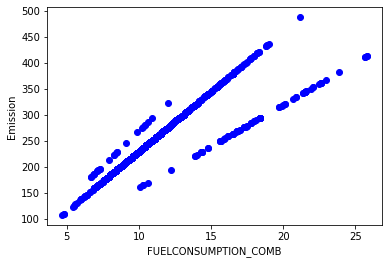

In [5]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

###### untuk fitur Engine size

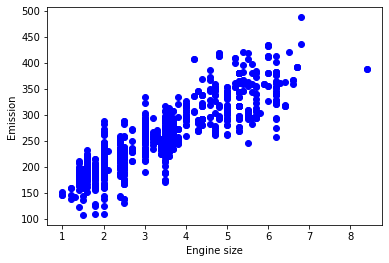

In [6]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

## Latihan
Silahkan melakukan plot fitur lain dalam data frame terhadap emisi untuk mendapatkan gambaran sepeeti 2 fitur diatas:

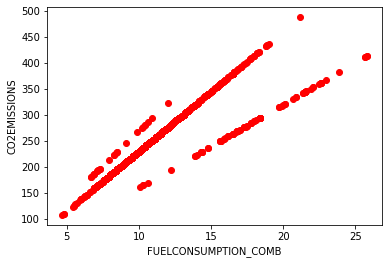

In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

df = pd.read_csv(r"FuelConsumption.csv")
df.head()

plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='red')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("CO2EMISSIONS")
plt.show()

#### Membuat dataset  pelatihan (train dan test)

Train / Test Split adalah cara kita memisahkan dataset kita menjadi 2 yaitu dataset untuk melatih model dan dataset untuk menguji model yang telah dilatih.
Karena kita telah mengetahui hasil dari dataset test, sedangkan model yang kita latih tidak mengetahui hal ini, jadi cara ini sangat cocok untuk mengevaluasi kemampuan dari model kita.


In [21]:
msk = np.random.rand(len(df)) < 0.8
c = np.count_nonzero(msk)
d = np.count_nonzero(~msk)
print(c) # silahkan ganti nilai 0.8 menjadi 0.6 dan lihat bahwa data yang digunakan untuk latihan juga akan berubah
print(d) # ini jumlah data testingnya

843
224


In [22]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk] #dipilih untuk train model 
test = cdf[~msk] #dipilih untuk ngetest model

### Simple Regression Model
Linear Regression melakukan proses 'fitting' data pada sebuah model linier dengan koefisien B = (B1, ..., Bn) untuk meminimalkan nilai 'residual sum of squares' antara variabel independent  x dalam dataset dan variabel dependent y dengan menggunakan aproximasi linier. 

#### Distribusi Train data

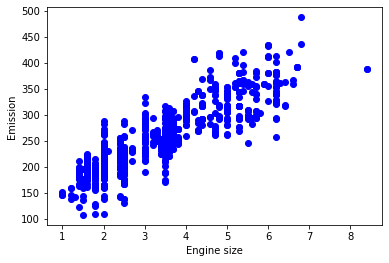

In [23]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

#### Modeling
Kita menggunakan package yang diberikan oleh sklearn untuk memodelkan data.

In [25]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[39.17260652]]
Intercept:  [124.94890183]


Perhatikan bahwa kita bisa melakukan fit untuk fitur manapun pada contoh di atas saya hanya melakukan regresi ENGINESIZE vs CO2EMISSIONS, kita bisa melakukan fit model kita menggunakan fitur yang lain.

#### model kita sekarang ada di variabel regr
###### oh iya model ini disebut juga offline model coba baca-baca ya mengenai offline dan online model

#### Plot outputs

kita dapat membuat plot garis model kita (warna merah) pada sebaran data:

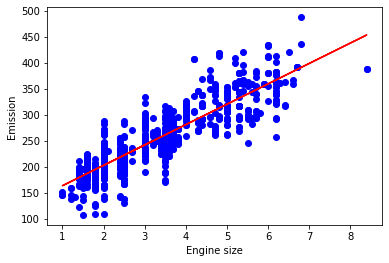

In [26]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

#### Evaluasi Model
kita bisa melakukan evaluasi model dengan membandingkan nilai sebenarnya (dari CO2EMISSIONS) pada test data dengan nilai yang diprediksi oleh model kita, ini akan memberi kita sebuah nilai (perbedaan nilai antara nilai yang sebenarnya di dataset vs nilai hasi prediksi) jika terjadi perbedaan, perbedaan inilah yang disebut sebagai error.

Banyak cara melakukan evaluasi model, dalam kasus ini coba kita lihat dengan menggunakan MSE (Mean Square Error) untuk meghitung akurasi model yang dihasilkan (kita test menggunakan dataset "test")

ini cara-cara lain yang bisa kita pakai :
- Mean absolute error: It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just average error.
- Mean Squared Error (MSE): Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean absolute error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones.
- Root Mean Squared Error (RMSE).
- R-squared is not error, but is a popular metric for accuracy of your model. It represents how close the data are to the fitted regression line. The higher the R-squared, the better the model fits your data. Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).


In [70]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 23.18
Residual sum of squares (MSE): 910.42
R2-score: 0.70


## Latihan 2

saat kita menghitung MSE diatas kita menhitung keseluruhan dataset, coba tuliskan kode agar kita bisa meramalkan satu buah entri data dan tunjukkan hasil regresi model kita, boleh juga ditambahkan perbandingan antara hasil regresi model kita vs nilai CO2EMISSIONS yang seharusnya

In [5]:
# Silahkan menjawab di bagian ini (jawaban ditunggu di Oase sesuai keterangan di Oase)
dataset = pd.read_csv(r"FuelConsumption.csv")

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X = dataset[['FUELCONSUMPTION_COMB']].values
Y = dataset['CO2EMISSIONS'].values
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
reg = LinearRegression()
reg.fit(X_Train, Y_Train)

LinearRegression()

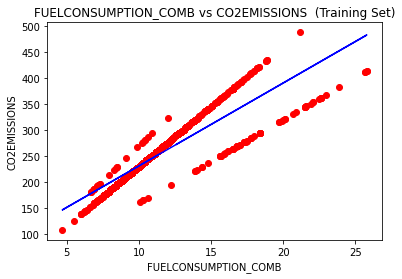

RMSE is 28.955431763676867


In [8]:
#visualisasi hasil dataset training
plt.scatter(X_Train, Y_Train, color = 'red')
plt.plot(X_Train, reg.predict(X_Train), color = 'blue')
plt.title('FUELCONSUMPTION_COMB vs CO2EMISSIONS  (Training Set)')
plt.xlabel('FUELCONSUMPTION_COMB')
plt.ylabel('CO2EMISSIONS')
plt.show()
from sklearn.metrics import mean_squared_error
y_train_prediksi = reg.predict(X_Train)
rmse = (np.sqrt(mean_squared_error(Y_Train, y_train_prediksi)))
print('RMSE is {}'.format(rmse))

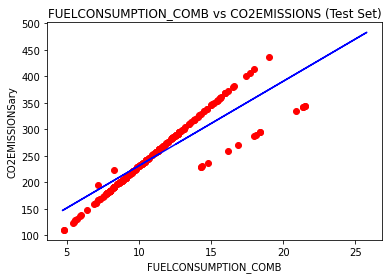

RMSE is 27.318871607482833


In [9]:
#visualisasi hasil dataset test
plt.scatter(X_Test, Y_Test, color = 'red')
plt.plot(X_Train, reg.predict(X_Train), color = 'blue')
plt.title('FUELCONSUMPTION_COMB vs CO2EMISSIONS (Test Set)')
plt.xlabel('FUELCONSUMPTION_COMB')
plt.ylabel('CO2EMISSIONSary')
plt.show()

from sklearn.metrics import mean_squared_error
y_test_prediksi = reg.predict(X_Test)
rmse = (np.sqrt(mean_squared_error(Y_Test, y_test_prediksi)))
print('RMSE is {}'.format(rmse))


## Latihan 3

kita membuat model menggunakan ENGINESIZE sebagai fiturnya VS CO2EMISSION sebagai target, tuliskan regresi lain yang bisa digunakan (misal fitur lain yang teman-teman dapatkan ketika melakukan plot) oh iya perlu diperhatikan fitur ENGINESIZE kita pilih karena lebih linier terhadap CO2EMISSION

In [10]:
# Silahkan buat model regresi menggunakan fitur yang berbeda disini ya (jawaban ditunggu di Oase sesuai keterangan di Oase)
dataset = pd.read_csv(r"C:\Users\ASUS\ML\LinierRegresion\FuelConsumption.csv")
df = dataset[['FUELCONSUMPTION_COMB','CO2EMISSIONS']]

Text(0, 0.5, 'CO2 Emissions')

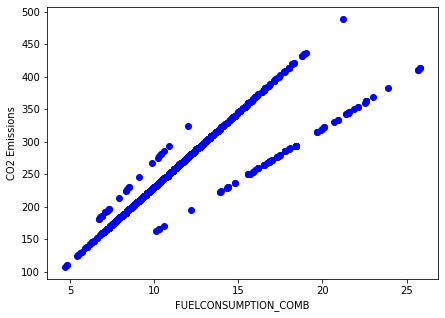

In [11]:
#membuat plot
plt.figure(figsize=(7, 5))
plt.scatter(df.FUELCONSUMPTION_COMB, df.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("CO2 Emissions")

In [12]:
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.model_selection import train_test_split 
# x = df['FUELCONSUMPTION_COMB'].values.reshape(-1,1)
# y = df['CO2EMISSIONS'].values.reshape(-1,1)
x = df.iloc[:,:-1].values #FUELCONSUMPTION_COMB #banyak baris,satu kolom
y = df.iloc[:,1].values #CO2EMISSIONS #satu baris banyak kolom
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4)
lin_reg = linear_model.LinearRegression()
lin_reg.fit(x_train,y_train)
print(lin_reg.coef_)
print(lin_reg.intercept_)

[16.3473602]
67.38052966895538


In [13]:
y_test_prediksi = lin_reg.predict(x_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_prediksi)))
print('RMSE -> {}'.format(rmse))

RMSE -> 28.733708619515912


Text(0.5, 1.0, 'Konsumsi Bahan Bakar vs Emisi CO2')

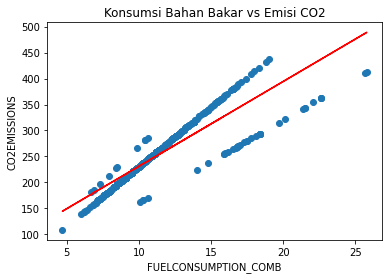

In [14]:
y_prediksi = lin_reg.predict(x_test)
plt.scatter(x_test, y_test)
plt.plot(x_test, y_prediksi, c='r')
plt.xlabel('FUELCONSUMPTION_COMB')
plt.ylabel('CO2EMISSIONS')
plt.title('Konsumsi Bahan Bakar vs Emisi CO2')

In [15]:
#Prediksi CO2EMISSIONS dengan FUELCONSUMPTION_COMB 10
lin_reg.predict([[7.7]])

array([193.25520318])

In [16]:
#Prediksi CO2EMISSIONS dengan FUELCONSUMPTION_COMB 
y_test_prediksi = lin_reg.predict(x_test)
dataframe = pd.DataFrame({'Data Sebenarnya' : y_test,'Data Prediksi': y_test_prediksi})
dataframe

,Data Sebenarnya,Data Prediksi
0,254,327.303557
1,161,181.812051
2,260,252.105700
3,191,203.063619
4,317,292.974100
...,...,...
422,242,239.027812
423,251,245.566756
424,258,250.470964
425,336,306.051989


In [17]:
lin_reg.score(x_test, y_test)

0.7850193785515218